In [1]:
import pandas as pd
data = pd.read_csv('2022-2023_data.csv')

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# Identify categorical and numerical features
categorical_features = ['country_of_origin', 'team', 'league', 'position', 'age_category']
numerical_features = data.drop(['annual_wages_eur', 'Unnamed: 0', 'player'] + categorical_features, axis=1).columns.tolist()

In [4]:
# One-hot encode categorical features
data_encoded = pd.get_dummies(data, columns=categorical_features)

In [5]:
# Split the data into features and target variable
X = data_encoded.drop(['annual_wages_eur', 'Unnamed: 0', 'player'], axis=1)
y = data['annual_wages_eur']

In [6]:
# Scaling the numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [7]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Building the Neural Network
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')

In [10]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=2)


Epoch 1/100
34/34 - 1s - 19ms/step - loss: 20190955831296.0000 - val_loss: 16036334141440.0000
Epoch 2/100
34/34 - 0s - 1ms/step - loss: 20186553909248.0000 - val_loss: 16024590090240.0000
Epoch 3/100
34/34 - 0s - 1ms/step - loss: 20144958996480.0000 - val_loss: 15944711667712.0000
Epoch 4/100
34/34 - 0s - 1ms/step - loss: 19953273012224.0000 - val_loss: 15647790596096.0000
Epoch 5/100
34/34 - 0s - 1ms/step - loss: 19370117955584.0000 - val_loss: 14893922123776.0000
Epoch 6/100
34/34 - 0s - 1ms/step - loss: 18220836716544.0000 - val_loss: 13521917050880.0000
Epoch 7/100
34/34 - 0s - 1ms/step - loss: 16297414885376.0000 - val_loss: 11743631769600.0000
Epoch 8/100
34/34 - 0s - 1ms/step - loss: 14112702595072.0000 - val_loss: 10246598688768.0000
Epoch 9/100
34/34 - 0s - 1ms/step - loss: 12499112951808.0000 - val_loss: 9699704438784.0000
Epoch 10/100
34/34 - 0s - 1ms/step - loss: 11820554256384.0000 - val_loss: 9633002422272.0000
Epoch 11/100
34/34 - 0s - 1ms/step - loss: 11582580981760.00

Epoch 89/100
34/34 - 0s - 1ms/step - loss: 5006320205824.0000 - val_loss: 3977864544256.0000
Epoch 90/100
34/34 - 0s - 1ms/step - loss: 4972194299904.0000 - val_loss: 3954565447680.0000
Epoch 91/100
34/34 - 0s - 1ms/step - loss: 4823910973440.0000 - val_loss: 3942058557440.0000
Epoch 92/100
34/34 - 0s - 1ms/step - loss: 4899127427072.0000 - val_loss: 3980092506112.0000
Epoch 93/100
34/34 - 0s - 1ms/step - loss: 4741378605056.0000 - val_loss: 3940780343296.0000
Epoch 94/100
34/34 - 0s - 1ms/step - loss: 4814882734080.0000 - val_loss: 3928335056896.0000
Epoch 95/100
34/34 - 0s - 1ms/step - loss: 4739135176704.0000 - val_loss: 3918689992704.0000
Epoch 96/100
34/34 - 0s - 1ms/step - loss: 4701745577984.0000 - val_loss: 3866547191808.0000
Epoch 97/100
34/34 - 0s - 1ms/step - loss: 4755076153344.0000 - val_loss: 3867781103616.0000
Epoch 98/100
34/34 - 0s - 1ms/step - loss: 4615949516800.0000 - val_loss: 3847495090176.0000
Epoch 99/100
34/34 - 0s - 1ms/step - loss: 4561709826048.0000 - val_lo

In [11]:
# Make predictions
y_pred_nn = model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [12]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error, r2_score
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

In [13]:
print("Neural Network RMSE:", rmse_nn, "R²:", r2_nn)

Neural Network RMSE: 1964309.686531792 R²: 0.6189865363939189


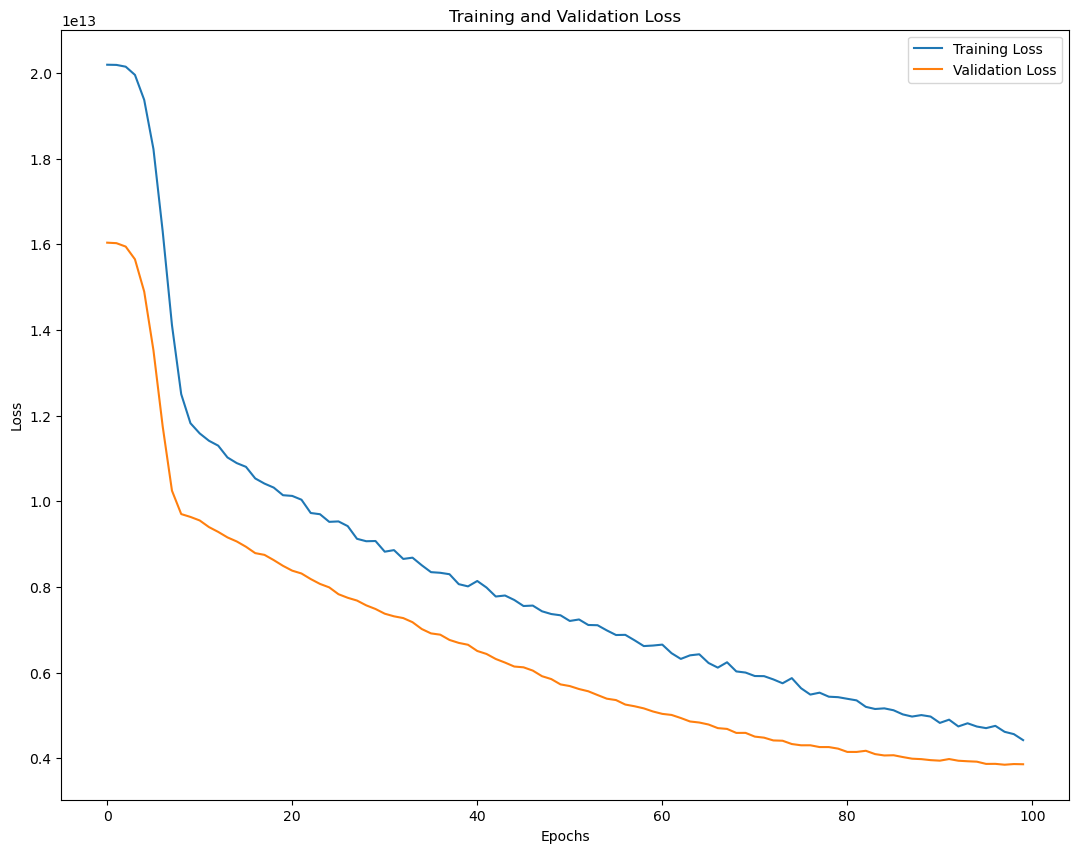

In [14]:
# Plot the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 10))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
https://public.tableau.com/app/profile/utku.oezkan/viz/Football-Country/NationvsLeague?publish=yes